In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Cust_data=pd.read_csv("/kaggle/input/customer-analysis/QVI_purchase_behaviour.csv")
Txn_data=pd.read_excel("/kaggle/input/customer-analysis/QVI_transaction_data.xlsx")

In [3]:
Txn_data.duplicated().sum()
duplicate_row = Txn_data[Txn_data.duplicated()]
print(Txn_data.duplicated().sum())
duplicate_row


1


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
124845,43374,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0


In [4]:
Txn_data = Txn_data.drop_duplicates(keep=False)

**Removed duplicates**

In [5]:
print(Cust_data.head())

   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream


In [6]:
print(Txn_data.head())

    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  


In [7]:
Cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [8]:
Txn_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264834 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264834 non-null  int64  
 1   STORE_NBR       264834 non-null  int64  
 2   LYLTY_CARD_NBR  264834 non-null  int64  
 3   TXN_ID          264834 non-null  int64  
 4   PROD_NBR        264834 non-null  int64  
 5   PROD_NAME       264834 non-null  object 
 6   PROD_QTY        264834 non-null  int64  
 7   TOT_SALES       264834 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 18.2+ MB


In [9]:
Txn_data["STORE_NBR"] = Txn_data["STORE_NBR"].astype("int16")
Txn_data["LYLTY_CARD_NBR"] = Txn_data["LYLTY_CARD_NBR"].astype("int32")
Txn_data["TXN_ID"] = Txn_data["TXN_ID"].astype("int32")
Txn_data["PROD_NBR"] = Txn_data["PROD_NBR"].astype("int16")
Txn_data["PROD_QTY"] = Txn_data["PROD_QTY"].astype("int32")
Txn_data["TOT_SALES"] = Txn_data["TOT_SALES"].astype("float32")

In [10]:
Txn_data['DATE'] = pd.to_datetime(Txn_data['DATE'], origin='1899-12-30', unit='D', errors='coerce')

In [11]:
Txn_data['DATE'].head()

0   2018-10-17
1   2019-05-14
2   2019-05-20
3   2018-08-17
4   2018-08-18
Name: DATE, dtype: datetime64[ns]

In [12]:
Txn_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264834 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264834 non-null  datetime64[ns]
 1   STORE_NBR       264834 non-null  int16         
 2   LYLTY_CARD_NBR  264834 non-null  int32         
 3   TXN_ID          264834 non-null  int32         
 4   PROD_NBR        264834 non-null  int16         
 5   PROD_NAME       264834 non-null  object        
 6   PROD_QTY        264834 non-null  int32         
 7   TOT_SALES       264834 non-null  float32       
dtypes: datetime64[ns](1), float32(1), int16(2), int32(3), object(1)
memory usage: 11.1+ MB


 We have assigning the right datatypesHere , we can see that the memory usage has come down to 9.1+MB from 16.2 MB, and adjusting the memory usage.

In [13]:
Txn_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264834,264834.000000,2.648340e+05,2.648340e+05,264834.000000,264834.000000,264834.000000
mean,2018-12-30 00:53:11.626452736,135.080322,1.355497e+05,1.351585e+05,56.583245,1.907308,7.304209
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,2018-09-30 00:00:00,70.000000,7.002100e+04,6.760050e+04,28.000000,2.000000,5.400000
50%,2018-12-30 00:00:00,130.000000,1.303580e+05,1.351385e+05,56.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030948e+05,2.027018e+05,85.000000,2.000000,9.200000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.784431,8.058024e+04,7.813329e+04,32.826746,0.643656,3.083593


In [14]:
Cust_data.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [15]:
Txn_data.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [16]:
Txn_data['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [17]:
Txn_data = Txn_data[~Txn_data['PROD_NAME'].str.contains('Salsa', case=False, na=False)]
Txn_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [18]:
Txn_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,2018-12-30 01:20:04.279808512,135.051325,1.355312e+05,1.351313e+05,56.351881,1.908061,7.321333
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351845e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030840e+05,2.026545e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.787366,8.071557e+04,7.814800e+04,33.695549,0.659834,3.077721


*****We can see that the maximum value is very high , i.e an outlier, so lets check the customer who made that transaction and frequency of it *****


In [19]:
outliers = Txn_data[Txn_data['PROD_QTY'] > 100]
print('Outliers')
outliers

Outliers


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


We can see that both the transactions(200 packets of chips) were made by the same customer.Lets see if the customer has other transaction

In [20]:
outlier_cust_transactions=Txn_data[Txn_data['LYLTY_CARD_NBR']==226000]
outlier_cust_transactions

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


It looks like this customer has only had the two transactions over the year and is not an ordinary retail customer. The customer might be buying chips for commercial purposes instead. We'll remove this loyalty card number from further analysis.

In [21]:
Txn_data=Txn_data[Txn_data['LYLTY_CARD_NBR']!=226000]
Txn_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [22]:
# Group by 'DATE' column and count transactions
transactions_by_date = Txn_data.groupby('DATE')['TXN_ID'].count()

# Display result
print(transactions_by_date)

DATE
2018-07-01    663
2018-07-02    650
2018-07-03    674
2018-07-04    669
2018-07-05    660
             ... 
2019-06-26    657
2019-06-27    669
2019-06-28    673
2019-06-29    703
2019-06-30    704
Name: TXN_ID, Length: 364, dtype: int64


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


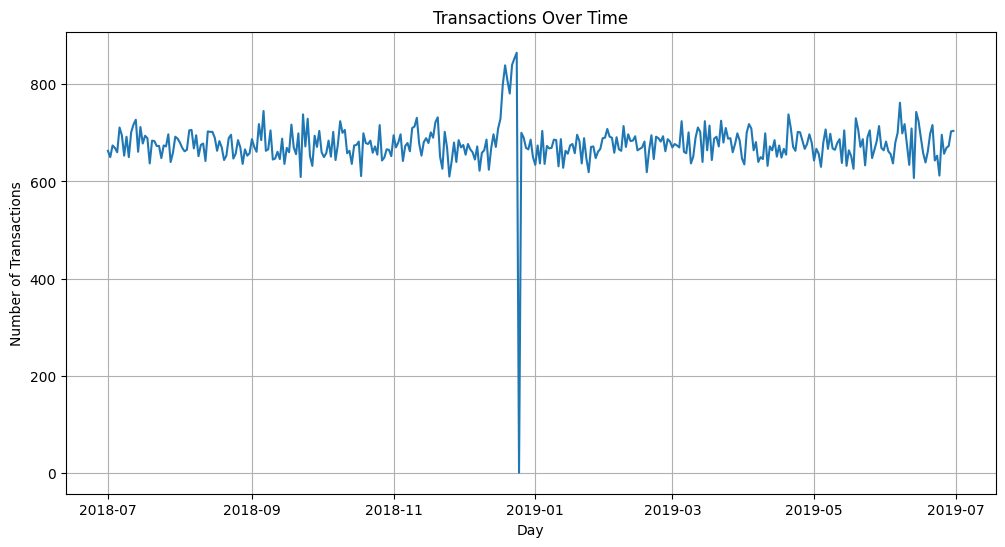

In [50]:
# Step 1: Create a full date range
date_range = pd.date_range(start="2018-07-01", end="2019-06-30")

# Step 2: Count transactions per day
transactions_by_date = Txn_data.groupby('DATE').size().reset_index(name='N')

# Step 3: Merge with full date range to find missing dates
full_data = pd.DataFrame({'DATE': date_range})
transactions_by_day = full_data.merge(transactions_by_date, on='DATE', how='left')

# Fill missing values (if a day had no transactions, set count to 0)
transactions_by_day['N'] = transactions_by_day['N'].fillna(0)

# Step 4: Plot transactions over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='DATE', y='N', data=transactions_by_day)

# Formatting
plt.xticks()  # Rotate x-axis labels for better visibility
plt.xlabel("Day")
plt.ylabel("Number of Transactions")
plt.title("Transactions Over Time")
plt.grid(True)

plt.show()


We can see that the drop in the sales i.e 0 sales is happening around christmas time, this is due to shops being closed on
Christmas day.

In [24]:
Txn_data["PACK_SIZE"] = Txn_data["PROD_NAME"].str.extract(r'(\d+)').astype(float)
Txn_data["PACK_SIZE"]

<ipython-input-24-40b3f5e36548>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Txn_data["PACK_SIZE"] = Txn_data["PROD_NAME"].str.extract(r'(\d+)').astype(float)


0         175.0
1         175.0
2         170.0
3         175.0
4         150.0
          ...  
264831    175.0
264832    175.0
264833    170.0
264834    150.0
264835    175.0
Name: PACK_SIZE, Length: 246738, dtype: float64

In [25]:
Txn_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,246738,246738.000000,2.467380e+05,2.467380e+05,246738.000000,246738.000000,246738.000000,246738.000000
mean,2018-12-30 01:20:01.517399040,135.050588,1.355305e+05,1.351306e+05,56.352305,1.906455,7.316124,175.583526
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,70.000000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756825e+04,26.000000,2.000000,5.800000,150.000000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000,170.000000
75%,2019-03-31 00:00:00,203.000000,2.030838e+05,2.026528e+05,87.000000,2.000000,8.800000,175.000000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000,380.000000
std,NaN,76.787240,8.071548e+04,7.814788e+04,33.695356,0.342501,2.474815,59.432359


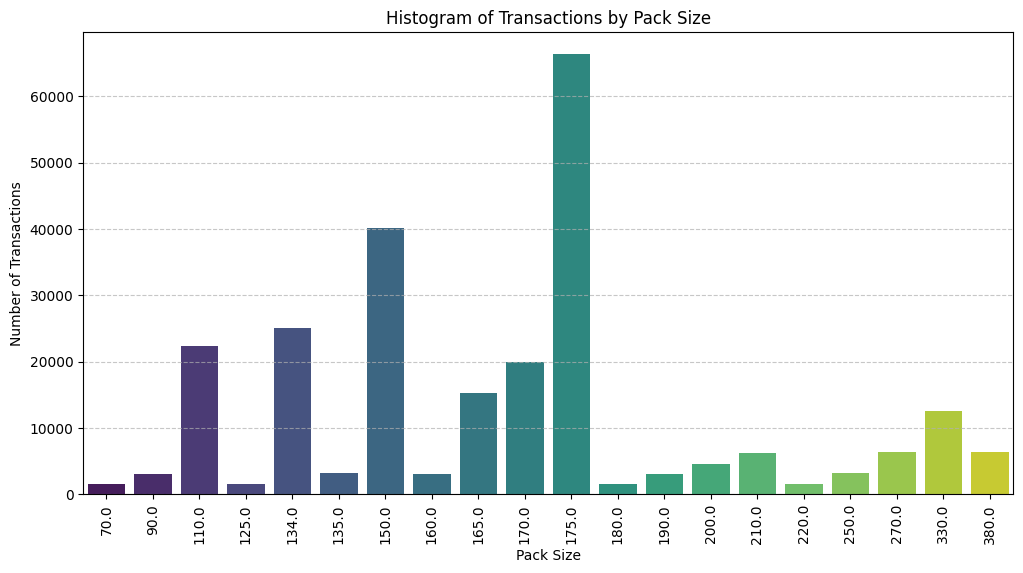

In [26]:
# Count transactions by PACK_SIZE
pack_size_counts = Txn_data['PACK_SIZE'].value_counts()

# Plot histogram (bar chart)
plt.figure(figsize=(12, 6))
sns.barplot(x=pack_size_counts.index, y=pack_size_counts.values, palette="viridis")

# Formatting
plt.xlabel("Pack Size")
plt.ylabel("Number of Transactions")
plt.title("Histogram of Transactions by Pack Size")
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [27]:
# Extract the first word as the brand name
Txn_data.loc[:, 'BRAND'] = Txn_data['PROD_NAME'].str.split().str[0]
Txn_data

<ipython-input-27-bf52517f89e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Txn_data.loc[:, 'BRAND'] = Txn_data['PROD_NAME'].str.split().str[0]


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,Kettle
...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175.0,Kettle
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175.0,Tostitos
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170.0,Doritos
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150.0,Doritos


In [28]:
Txn_data['BRAND'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'French', 'RRD', 'Tostitos', 'Cheetos',
       'Woolworths', 'Snbts', 'Sunbites'], dtype=object)

In [29]:
brand_replacements = {
    'Natural':'NCC',
    'Dorito': 'Doritos',
    'WW'  : 'Woolworths',
    'Red': 'RRD',
    'Smith': 'Smiths',
    'Infzns': 'Infuzions',
    'Grain': 'GrainWaves',
    'GrnWves': 'GrainWaves',
    'Snbts': 'Sunbites'  
}

Txn_data.loc[:,'BRAND'] = Txn_data['BRAND'].replace(brand_replacements)

In [30]:
print(Txn_data['BRAND'].nunique())
Txn_data['BRAND'].unique()

20


array(['NCC', 'CCs', 'Smiths', 'Kettle', 'GrainWaves', 'Doritos',
       'Twisties', 'Woolworths', 'Thins', 'Burger', 'Cheezels',
       'Infuzions', 'RRD', 'Pringles', 'Tyrrells', 'Cobs', 'French',
       'Tostitos', 'Cheetos', 'Sunbites'], dtype=object)

In [31]:
merged_data = Txn_data.merge(Cust_data, on='LYLTY_CARD_NBR', how='left')
merged_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,NCC,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,Kettle,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
246733,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175.0,Kettle,YOUNG SINGLES/COUPLES,Premium
246734,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175.0,Tostitos,YOUNG SINGLES/COUPLES,Premium
246735,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170.0,Doritos,YOUNG SINGLES/COUPLES,Premium
246736,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150.0,Doritos,YOUNG SINGLES/COUPLES,Premium


In [32]:
merged_data.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [33]:
merged_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,246738,246738.000000,2.467380e+05,2.467380e+05,246738.000000,246738.000000,246738.000000,246738.000000
mean,2018-12-30 01:20:01.517399040,135.050588,1.355305e+05,1.351306e+05,56.352305,1.906455,7.316124,175.583526
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,70.000000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756825e+04,26.000000,2.000000,5.800000,150.000000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000,170.000000
75%,2019-03-31 00:00:00,203.000000,2.030838e+05,2.026528e+05,87.000000,2.000000,8.800000,175.000000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000,380.000000
std,NaN,76.787240,8.071548e+04,7.814788e+04,33.695356,0.342501,2.474815,59.432359


**DATA EXPLORATION IS COMPLETE**

In [34]:
# Total sales by customer segment
sales_by_segment = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
sales_by_segment
pivot_df = sales_by_segment.pivot(index="LIFESTAGE", columns="PREMIUM_CUSTOMER", values="TOT_SALES")

# Reset index if needed (to make LIFESTAGE a normal column instead of index)
pivot_df.reset_index(inplace=True)

# Display the transformed DataFrame
pivot_df

PREMIUM_CUSTOMER,LIFESTAGE,Budget,Mainstream,Premium
0,MIDAGE SINGLES/COUPLES,33345.699219,84734.250000,54443.851562
1,NEW FAMILIES,20607.449219,15979.700195,10760.799805
2,OLDER FAMILIES,156863.750000,96413.546875,75242.601562
3,OLDER SINGLES/COUPLES,127833.601562,124648.500000,123525.546875
4,RETIREES,105916.296875,145168.953125,91296.648438
5,YOUNG FAMILIES,129717.953125,86338.250000,78571.703125
6,YOUNG SINGLES/COUPLES,57122.101562,147582.203125,39052.300781


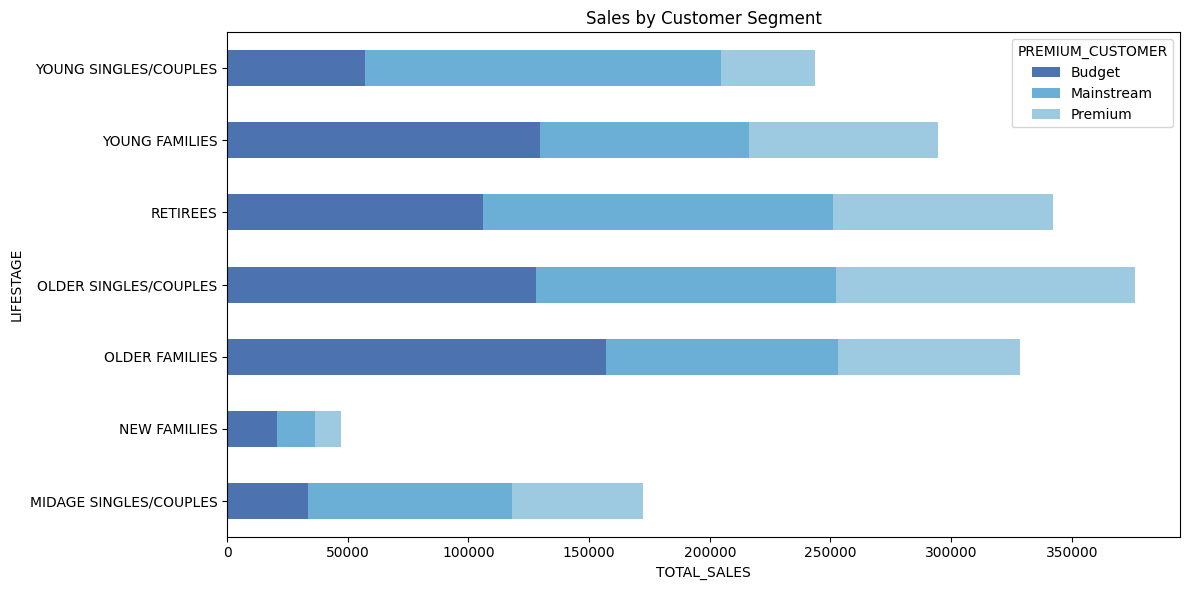

In [84]:
pivot_df.plot( x='LIFESTAGE',  kind='barh',stacked=True, figsize=(12, 6), color=['#4c72b0', '#6baed6', '#9ecae1'],title='Sales by Customer Segment')
plt.xlabel('TOTAL_SALES')
plt.ylabel('LIFESTAGE')  # removes the redundant y-axis label
plt.tight_layout()
plt.show()


Sales are coming mainly from Budget - older families, Mainstream - young singles/couples and Mainstream - retirees

In [36]:
#No. of customers in each segment
customers_per_segment=merged_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()
customers_per_segment = customers_per_segment.rename(columns={'LYLTY_CARD_NBR': 'NO_OF_CUSTOMERS'})
customers_per_segment
customers_per_segment = customers_per_segment.pivot(index="LIFESTAGE", columns="PREMIUM_CUSTOMER", values="NO_OF_CUSTOMERS")

# Reset index if needed (to make LIFESTAGE a normal column instead of index)
customers_per_segment.reset_index(inplace=True)
customers_per_segment

PREMIUM_CUSTOMER,LIFESTAGE,Budget,Mainstream,Premium
0,MIDAGE SINGLES/COUPLES,1474,3298,2369
1,NEW FAMILIES,1087,830,575
2,OLDER FAMILIES,4611,2788,2231
3,OLDER SINGLES/COUPLES,4849,4858,4682
4,RETIREES,4385,6358,3812
5,YOUNG FAMILIES,3953,2685,2398
6,YOUNG SINGLES/COUPLES,3647,7917,2480


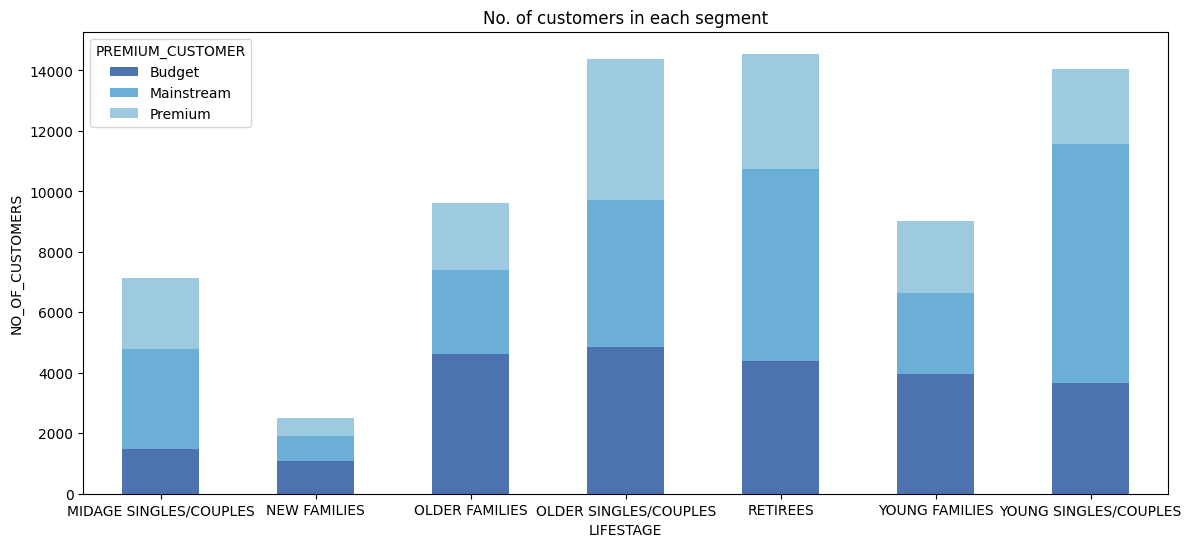

In [97]:
customers_per_segment.plot(x='LIFESTAGE', kind='bar', stacked=True,figsize=(14,6),color=['#4c72b0', '#6baed6', '#9ecae1'],ylabel='NO_OF_CUSTOMERS',
        title='No. of customers in each segment')
plt.xticks(rotation="horizontal")
plt.show()

There are more Mainstream - young singles/couples and Mainstream - retirees customers who buy chips. This contributes to there being more sales to these customer segments but this is not a major drive for the Budget - Older families segment.
  
  Higher sales may also be driven by more units of chips being bought per customer.Let's have a look at this next.

In [38]:
#Average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER
AVG_PROD_QTY_PER_CUSTOMER = (merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum() / 
                             merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique()).reset_index()
AVG_PROD_QTY_PER_CUSTOMER = AVG_PROD_QTY_PER_CUSTOMER.rename(columns={0: 'AVG_PROD_QTY'})

AVG_PROD_QTY_PER_CUSTOMER  = AVG_PROD_QTY_PER_CUSTOMER.sort_values(by='AVG_PROD_QTY', ascending=False)
AVG_PROD_QTY_PER_CUSTOMER.head(10)

,LIFESTAGE,PREMIUM_CUSTOMER,AVG_PROD_QTY
7,OLDER FAMILIES,Mainstream,9.255380
6,OLDER FAMILIES,Budget,9.076773
8,OLDER FAMILIES,Premium,9.071717
15,YOUNG FAMILIES,Budget,8.722995
17,YOUNG FAMILIES,Premium,8.716013
16,YOUNG FAMILIES,Mainstream,8.638361
9,OLDER SINGLES/COUPLES,Budget,6.781398
11,OLDER SINGLES/COUPLES,Premium,6.768689
10,OLDER SINGLES/COUPLES,Mainstream,6.712021
1,MIDAGE SINGLES/COUPLES,Mainstream,6.432080


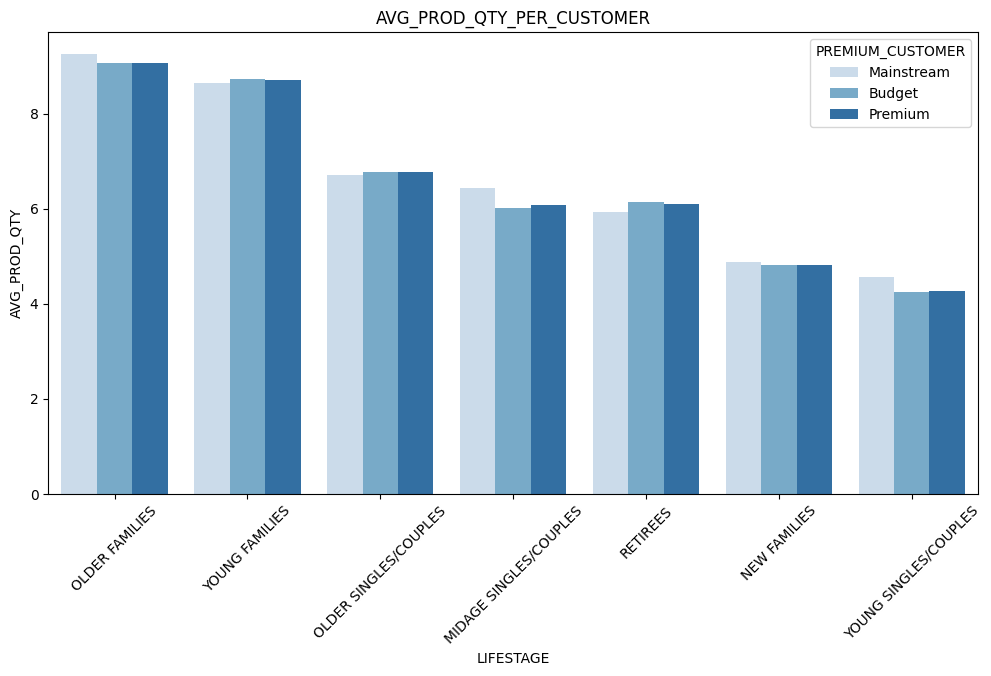

In [64]:
# Plot Histogram # Visualization: Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER

plt.figure(figsize=(12, 6))
sns.barplot(data = AVG_PROD_QTY_PER_CUSTOMER , x = "LIFESTAGE",y='AVG_PROD_QTY', hue = "PREMIUM_CUSTOMER",palette='Blues')

# Formatting
 # Rotate x-axis labels for better visibility
plt.xticks(rotation=45) 
plt.xlabel("LIFESTAGE")
plt.ylabel("AVG_PROD_QTY")
plt.title("AVG_PROD_QTY_PER_CUSTOMER")

plt.show()

Older families and young families in general buy more chips per customer

In [40]:
# Calculate total sales and total quantity sold per segment
total_sales_per_segment = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum()
total_qty_per_segment = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum()

# Compute the average price per unit
avg_price_per_unit = (total_sales_per_segment / total_qty_per_segment).reset_index()

# Rename columns
avg_price_per_unit.columns = ['LIFESTAGE', 'PREMIUM_CUSTOMER', 'AVG_PRICE_PER_UNIT']

# Sort by AVG_PRICE_PER_UNIT in descending order
avg_price_per_unit = avg_price_per_unit.sort_values(by='AVG_PRICE_PER_UNIT', ascending=False)

print(avg_price_per_unit)

                 LIFESTAGE PREMIUM_CUSTOMER  AVG_PRICE_PER_UNIT
19   YOUNG SINGLES/COUPLES       Mainstream            4.074043
1   MIDAGE SINGLES/COUPLES       Mainstream            3.994449
4             NEW FAMILIES       Mainstream            3.935887
12                RETIREES           Budget            3.932730
3             NEW FAMILIES           Budget            3.931969
14                RETIREES          Premium            3.924037
11   OLDER SINGLES/COUPLES          Premium            3.897812
9    OLDER SINGLES/COUPLES           Budget            3.887529
5             NEW FAMILIES          Premium            3.886168
13                RETIREES       Mainstream            3.852986
10   OLDER SINGLES/COUPLES       Mainstream            3.822753
2   MIDAGE SINGLES/COUPLES          Premium            3.780823
15          YOUNG FAMILIES           Budget            3.761903
17          YOUNG FAMILIES          Premium            3.759232
0   MIDAGE SINGLES/COUPLES           Bud

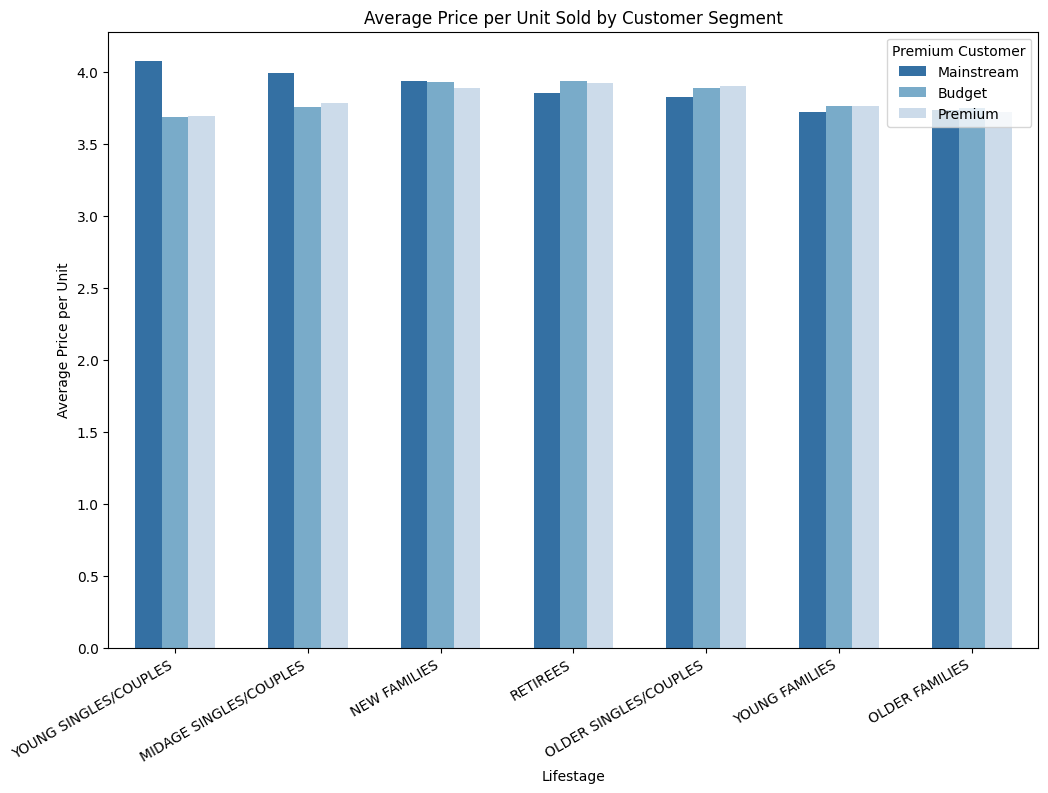

In [41]:
# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=avg_price_per_unit, y='AVG_PRICE_PER_UNIT', x='LIFESTAGE',hue='PREMIUM_CUSTOMER',palette='Blues_r',width=0.6)

# Improve plot aesthetics
plt.xticks(rotation=30, ha='right')  # Rotate x-axis labels for readability
plt.xlabel("Lifestage")
plt.ylabel("Average Price per Unit")
plt.title("Average Price per Unit Sold by Customer Segment")
plt.legend(title="Premium Customer")

# Show the plot
plt.show()

Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium
counterparts. This may be dueto premium shoppers being more likely to buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own consumption.This is also supported by there being fewer premium midage and young singles and
couples buying chips compared to their mainstream counterparts.
      As the difference in average price per unit isn't large, we can check if this difference is statistically different.

In [42]:
from scipy.stats import ttest_ind
#Price per unit
merged_data['PRICE_PER_UNIT'] = merged_data['TOT_SALES'] / merged_data['PROD_QTY']


# Filter data for the required groups
mainstream_group = merged_data[
    (merged_data['PREMIUM_CUSTOMER'] == 'Mainstream') &
    (merged_data['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES']))
]['PRICE_PER_UNIT']

budget_premium_group = merged_data[
    (merged_data['PREMIUM_CUSTOMER'].isin(['Budget', 'Premium'])) &
    (merged_data['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES']))
]['PRICE_PER_UNIT']

# Perform independent t-test
t_stat, p_value = ttest_ind(mainstream_group, budget_premium_group, equal_var=False)  # Welch's t-test

# Print results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The unit price for mainstream, young and mid-age singles/couples is significantly higher than that of budget or premium, young and mid-age singles/couples.")
else:
    print("There is no significant difference in unit price between mainstream and budget/premium young and mid-age singles/couples.")


T-statistic: 37.62438853656688
P-value: 6.967369525948274e-306
The unit price for mainstream, young and mid-age singles/couples is significantly higher than that of budget or premium, young and mid-age singles/couples.


# Deep Dive into Mainstream Young Singles/Couples: Brand Preference Analysis

We might want to target customer segments that contribute the most to sales to retain them or furtherincrease sales. Let’s look at Mainstream - young singles/couples. For instance, let’s find out if they tend to buy a particular brand of chips.

In [43]:
#Step1: Filter data for Mainstream Midage and Young Singles/Couples

target_segment = merged_data[
    merged_data['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES']) &
    (merged_data['PREMIUM_CUSTOMER'] == 'Mainstream')
]
print(target_segment['LIFESTAGE'].unique())  # Should return only 'YOUNG SINGLES/COUPLES' and 'MIDAGE SINGLES/COUPLES'
print(target_segment['PREMIUM_CUSTOMER'].unique())  # Should return only 'Mainstream'
target_segment.head() # Check the first few rows


['MIDAGE SINGLES/COUPLES' 'YOUNG SINGLES/COUPLES']
['Mainstream']


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,PRICE_PER_UNIT
4692,2019-05-18,3,3159,1759,77,Doritos Corn Chips Nacho Cheese 170g,2,8.8,170.0,Doritos,MIDAGE SINGLES/COUPLES,Mainstream,4.4
4693,2019-05-16,3,3294,2370,51,Doritos Mexicana 170g,2,8.8,170.0,Doritos,MIDAGE SINGLES/COUPLES,Mainstream,4.4
4694,2018-08-18,4,4187,3492,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175.0,Kettle,MIDAGE SINGLES/COUPLES,Mainstream,5.4
4695,2019-05-19,4,4264,3841,47,Doritos Corn Chips Original 170g,2,8.8,170.0,Doritos,MIDAGE SINGLES/COUPLES,Mainstream,4.4
4696,2018-08-19,7,7036,6447,114,Kettle Sensations Siracha Lime 150g,1,4.6,150.0,Kettle,MIDAGE SINGLES/COUPLES,Mainstream,4.6


In [44]:
#Step 2: Get Brand Purchase Proportion
#Count purchases per brand
brand_counts = target_segment['BRAND'].value_counts()

# Convert to proportion
brand_proportion = brand_counts / brand_counts.sum()

# Display top brands
print(brand_proportion.head(10))

BRAND
Kettle       0.195176
Doritos      0.117138
Pringles     0.113385
Smiths       0.104344
Infuzions    0.062959
Thins        0.058781
RRD          0.048500
Twisties     0.045367
Tostitos     0.044682
Cobs         0.044355
Name: count, dtype: float64


In [45]:
#Step 3: Compare with Other Segments
# Get overall brand proportions
overall_brand_counts = merged_data['BRAND'].value_counts()
overall_brand_proportion = overall_brand_counts / overall_brand_counts.sum()

brand_affinity = (brand_proportion / overall_brand_proportion).sort_values(ascending=False)    
# Brand Affinity= Proportion of Brand in Overall Population/Proportion of Brand in Target Segment
# If affinity > 1 → The brand is more preferred by the target segment than the overall population.
# If affinity < 1 → The brand is less preferred by the target segment compared to the overall population.
# If affinity = 1 → The target segment buys the brand in the same proportion as the overall population.

brand_affinity

BRAND
Twisties      1.184024
Kettle        1.166377
Tostitos      1.164043
Tyrrells      1.146331
Doritos       1.145832
Cobs          1.129075
Pringles      1.114507
Infuzions     1.093893
GrainWaves    1.041489
Thins         1.030450
Cheezels      0.991981
Smiths        0.848264
Cheetos       0.773117
RRD           0.733219
NCC           0.717002
French        0.687180
CCs           0.674186
Burger        0.566392
Woolworths    0.561320
Sunbites      0.527412
Name: count, dtype: float64

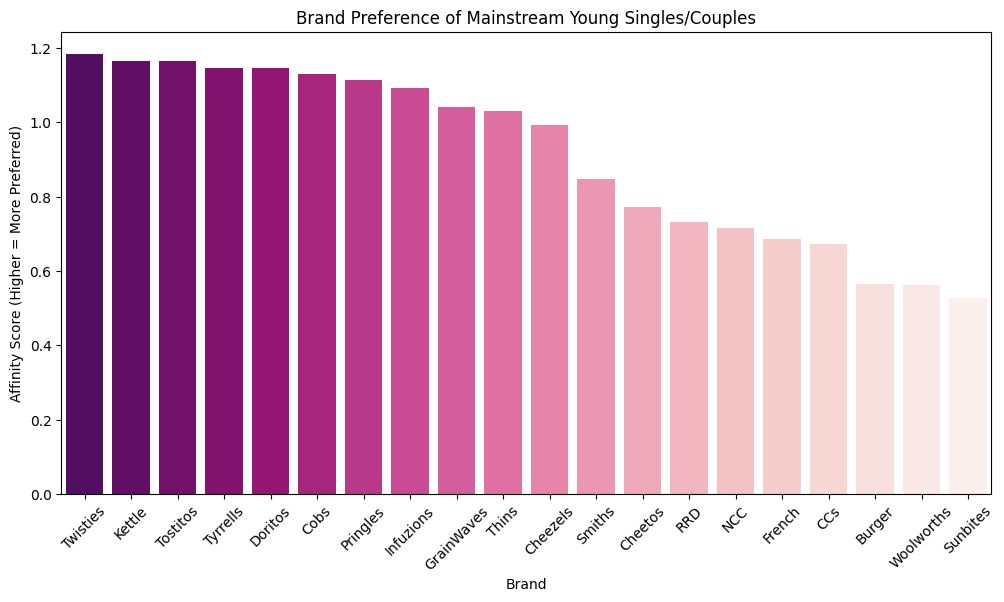

In [46]:
#Step 4: Visualizing Preferences
#Select top 10 brands with highest affinity
top_brands = brand_affinity

plt.figure(figsize=(12,6))
sns.barplot(x=top_brands.index, y=top_brands.values, palette="RdPu_r")
plt.xticks(rotation=45)
plt.title("Brand Preference of Mainstream Young Singles/Couples")
plt.xlabel("Brand")
plt.ylabel("Affinity Score (Higher = More Preferred)")
plt.show()


Mainstream young singles/couples are more likely to purchase Twisties chips and less likely to purchase sunbites compared to the rest of the population


# Let's also find out if our target segment tends to buy larger packs of chips.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

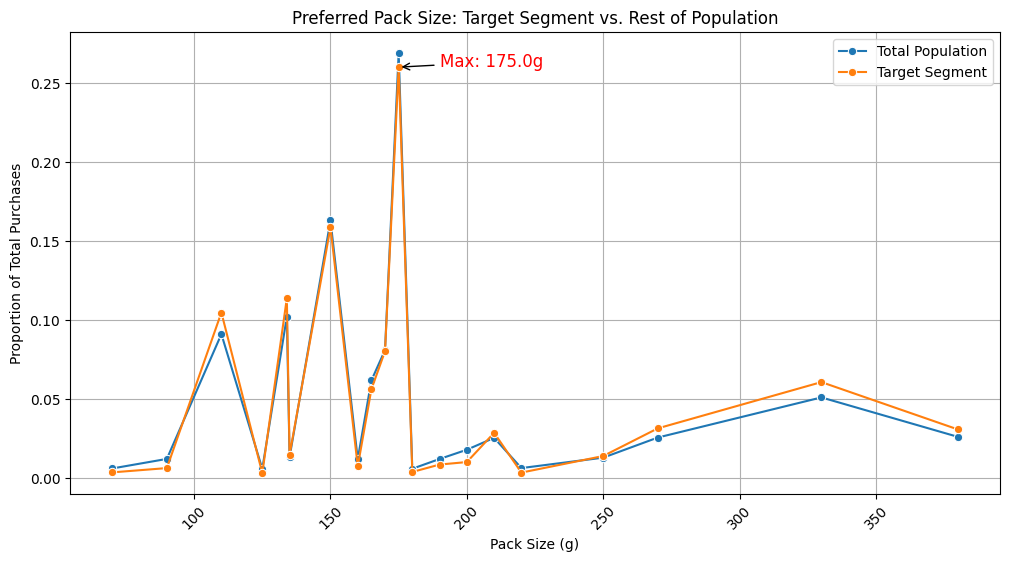

In [47]:
# Calculate total quantity of chips bought by pack size
avg_pack_size_target = target_segment.groupby('PACK_SIZE')['PROD_QTY'].sum().reset_index()
avg_pack_size_total = merged_data.groupby('PACK_SIZE')['PROD_QTY'].sum().reset_index()

# Normalize values for comparison (convert to proportions)
avg_pack_size_target['PROD_QTY'] /= avg_pack_size_target['PROD_QTY'].sum()
avg_pack_size_total['PROD_QTY'] /= avg_pack_size_total['PROD_QTY'].sum()

# Merge both datasets for visualization
merged_pack_size = avg_pack_size_total.merge(avg_pack_size_target, on='PACK_SIZE', suffixes=('_total', '_target'))

# Plot comparison
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_pack_size, x='PACK_SIZE', y='PROD_QTY_total', label="Total Population", marker='o')
sns.lineplot(data=merged_pack_size, x='PACK_SIZE', y='PROD_QTY_target', label="Target Segment", marker='o')

# Find the highest pack size value for the target segment
max_index = merged_pack_size['PROD_QTY_target'].idxmax()
max_pack_size = merged_pack_size.loc[max_index, 'PACK_SIZE']
max_value = merged_pack_size.loc[max_index, 'PROD_QTY_target']

plt.annotate(f'Max: {max_pack_size}g', 
             xy=(max_pack_size, max_value), 
             xytext=(max_pack_size + 15, max_value),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=12, color='red')

plt.xlabel("Pack Size (g)")
plt.ylabel("Proportion of Total Purchases")
plt.title("Preferred Pack Size: Target Segment vs. Rest of Population")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


It looks like Mainstream young singles/couples are  more likely to purchase a 270g,330g,380g pack of chips compared to the rest of the population but let’s dive into what brands sell this pack size.
 We can also see that 175g chips are more purchased both by target and overall customers which are produced by almost 8 Brannds, so we will exclude that 

In [48]:
brands_270 = merged_data.loc[merged_data['PACK_SIZE'] .isin([270,330,380]), 'BRAND'].unique()
print(brands_270)


['Smiths' 'Twisties' 'Doritos' 'Cheezels']


So this may be reflecting a higher likelihood of purchasing 'Smiths' 'Twisties' 'Doritos' 'Cheezels'  brands 

Conclusion:
Sales have mainly been due to Budget - older families, Mainstream - young singles/couples, and Mainstream- retirees shoppers.
We found that the high spend in chips for mainstream young singles/couples and retirees is due to there being more of them than other buyers.
Mainstream, midage and young singles and couples are also more likely to pay more per packet of chips. This is indicative of impulse buying behaviour.
We’ve also found that Mainstream young singles and couples are  more likely to purchase Twisties chips compared to the rest of the population. 
Its suggested to increase the category’s performance by off-locating some Twisties and smaller packs of chips in discretionary space near segments where young singles and couples frequent more often to increase visibilty and impulse behaviour.

In [49]:
# Save cleaned data
merged_data.to_csv("Cleaned_Transaction_Data.csv", index=False)
print("\nData cleaning and analysis complete. Cleaned data saved.")


Data cleaning and analysis complete. Cleaned data saved.
